코로나19에 대한 나라별 데이터로 모델링 진행

2-1 마지막 일자를 기준으로 인구 대비 확진자 비율이 높은 상위 5개 국가를 구하여라
상위 5개 국가별로 누적 확진자, 일일 확진자, 누적 사망자, 일일 사망자, 그래프, 범례를 이용해서 가독성 있게 만들어라

In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv("problem2.csv")

In [2]:
data

,location,date,total_cases,total_deaths,new_tests,population,new_vaccinations
0,Afghanistan,2020-02-24,5.0,NaN,NaN,39835428.0,NaN
1,Afghanistan,2020-02-25,5.0,NaN,NaN,39835428.0,NaN
2,Afghanistan,2020-02-26,5.0,NaN,NaN,39835428.0,NaN
3,Afghanistan,2020-02-27,5.0,NaN,NaN,39835428.0,NaN
4,Afghanistan,2020-02-28,5.0,NaN,NaN,39835428.0,NaN
...,...,...,...,...,...,...,...
136926,Zimbabwe,2021-11-26,133836.0,4704.0,2719.0,15092171.0,31285.0
136927,Zimbabwe,2021-11-27,133836.0,4704.0,4152.0,15092171.0,16111.0
136928,Zimbabwe,2021-11-28,133951.0,4705.0,1044.0,15092171.0,8252.0
136929,Zimbabwe,2021-11-29,134226.0,4706.0,3067.0,15092171.0,17809.0


- location : 지역명
- date : 일자
- total_cases : 누적 확인자
- total_deaths : 누적 사망자
- new_tests : 검사자
- population : 인구
- new_vaccinations : 백신 접종자

In [16]:
# 인구 대비 확진자 비율
data['ratio']=data['total_cases']/data['population']
data

,location,date,total_cases,total_deaths,new_tests,population,new_vaccinations,ratio,new_cases,new_caeses,new_deaths,total_vaccinations,7days_new_case
0,Afghanistan,2020-02-24,5.0,0.0,0.0,39835428.0,0.0,1.255164e-07,NaN,5.0,0.0,0.0,0.0
1,Afghanistan,2020-02-25,5.0,0.0,0.0,39835428.0,0.0,1.255164e-07,0.0,NaN,0.0,0.0,0.0
2,Afghanistan,2020-02-26,5.0,0.0,0.0,39835428.0,0.0,1.255164e-07,0.0,NaN,0.0,0.0,0.0
3,Afghanistan,2020-02-27,5.0,0.0,0.0,39835428.0,0.0,1.255164e-07,0.0,NaN,0.0,0.0,0.0
4,Afghanistan,2020-02-28,5.0,0.0,0.0,39835428.0,0.0,1.255164e-07,0.0,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136925,Zimbabwe,2021-11-25,133774.0,4704.0,2291.0,15092171.0,26173.0,8.863801e-03,27.0,NaN,1.0,5709051.0,17716.0
136926,Zimbabwe,2021-11-26,133836.0,4704.0,2719.0,15092171.0,31285.0,8.867909e-03,62.0,NaN,0.0,5740336.0,17785.0
136927,Zimbabwe,2021-11-27,133836.0,4704.0,4152.0,15092171.0,16111.0,8.867909e-03,0.0,NaN,0.0,5756447.0,19518.0
136928,Zimbabwe,2021-11-28,133951.0,4705.0,1044.0,15092171.0,8252.0,8.875529e-03,115.0,NaN,1.0,5764699.0,19348.0


In [17]:
data['date']=pd.to_datetime(data['date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135745 entries, 0 to 136929
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   location            135745 non-null  object        
 1   date                135745 non-null  datetime64[ns]
 2   total_cases         135745 non-null  float64       
 3   total_deaths        135745 non-null  float64       
 4   new_tests           135745 non-null  float64       
 5   population          135745 non-null  float64       
 6   new_vaccinations    135745 non-null  float64       
 7   ratio               135745 non-null  float64       
 8   new_cases           135510 non-null  float64       
 9   new_caeses          235 non-null     float64       
 10  new_deaths          135745 non-null  float64       
 11  total_vaccinations  135745 non-null  float64       
 12  7days_new_case      135745 non-null  float64       
dtypes: datetime64[ns](1), float64

In [18]:
data.isna().sum()

location                   0
date                       0
total_cases                0
total_deaths               0
new_tests                  0
population                 0
new_vaccinations           0
ratio                      0
new_cases                235
new_caeses            135510
new_deaths                 0
total_vaccinations         0
7days_new_case             0
dtype: int64

In [19]:
import matplotlib.pyplot as plt
data=data.fillna(0)
data=data[data['date']!='2021-11-30']

In [20]:
data=data[data['population']!=0]

In [21]:
for location in data.location.unique():
    lo=data[data.location==location]
    #일일 확진자
    data.loc[lo.index, 'new_cases']=lo.total_cases.diff().values
    data.loc[lo.index[0], 'new_caeses']=lo['total_cases'].values[0]
    
    #일일 사망자
    data.loc[lo.index, 'new_deaths']=lo.total_deaths.diff().values
    data.loc[lo.index[0], 'new_deaths']=lo['total_deaths'].values[0]
    
    #누적 백신 접종자
    data.loc[lo.index, 'total_vaccinations']=lo['new_vaccinations'].cumsum().values
    
    #일주일 평균 검사자(?)
    data.loc[lo.index, '7days_new_case']=lo['new_tests'].rolling(7).sum().fillna(0).values

- plot

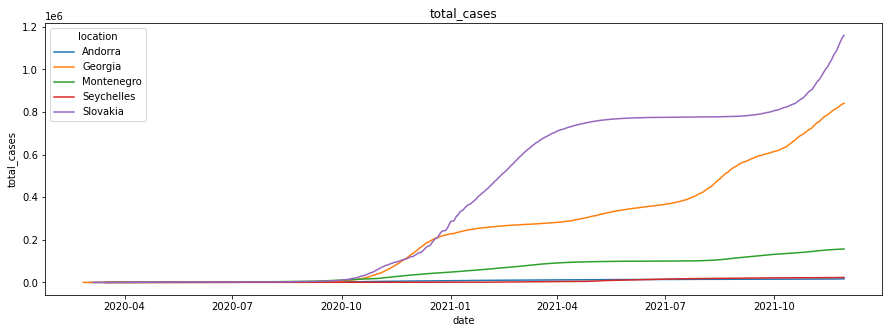

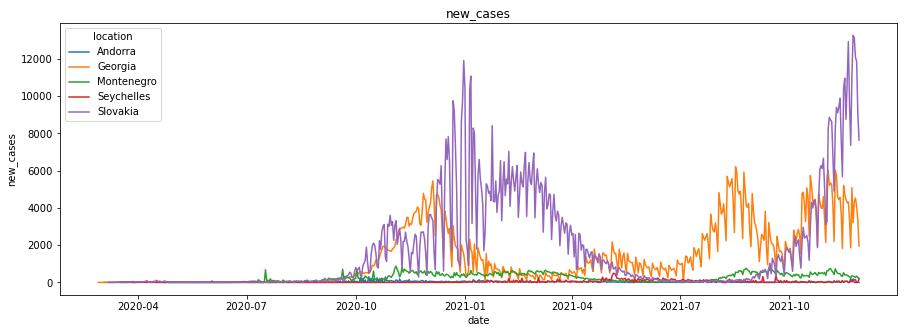

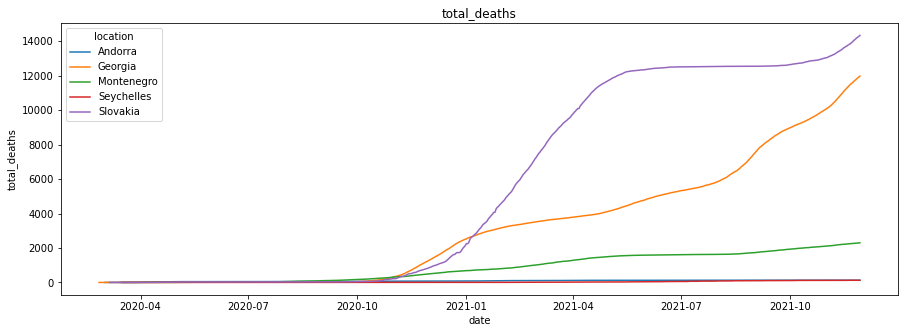

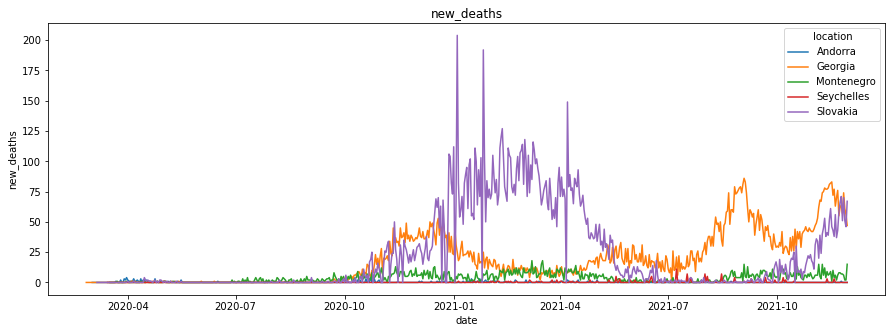

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

#나라별 마지막 행만 출력
#ratio(인구대비 확진자 비율) 순으로 정렬, 상위 5개 나라
locations=data.groupby(['location']).tail(1).sort_values('ratio', ascending=False).location.head(5).values
target=data[data.location.isin(locations)].reset_index(drop=True)

for v in ['total_cases', 'new_cases', 'total_deaths', 'new_deaths']:
    plt.figure(figsize=(15,5))
    plt.title(v)
    sns.lineplot(data=target, x='date', y=v, hue='location')
    plt.show()

2-2 코로나 위험지수를 직접 만들고 그 위험지수에 대한 설명을 적고 위험지수가 높은 국가들 10개를 선정해서 시각화

코로나 위험지수는 코로나로 인한 국가의 위기정도를 표현한다. 코로나 전파 특성상 최근 일주일의 확진자 숫자가 그다음의 일주일에 영향을 준다.     
일일 사망자수(new_death)는 현재 코로나의 국가 내에서의 치명율을 표현한다. 위기정도는 누적 백신인구에 의해 감소 될수 있다. 
* 국가간의 비교를 위해 각 국가의 인구수로 나눠주어 값을 스케일링하고, 변수간 보정상수를 통해 정수화를 유도한다


In [26]:
def ratio_index(x):
    value=(x['7days_new_case']/x['population']+x['new_deaths']/x['population']-x['total_vaccinations']/x['population']*0.001)*100
    return value

data['ratio_index']=data.apply(ratio_index, axis=1)

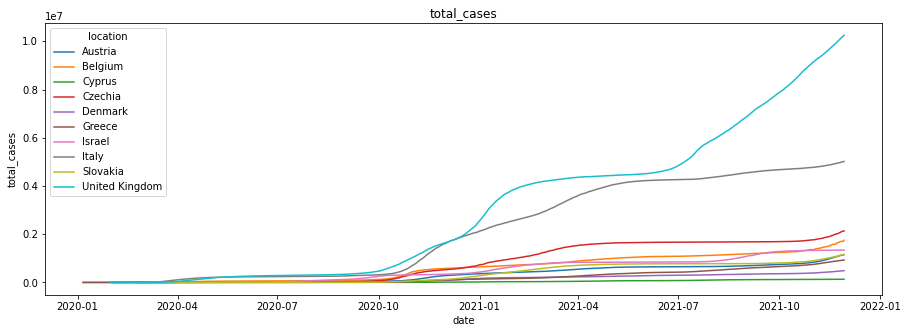

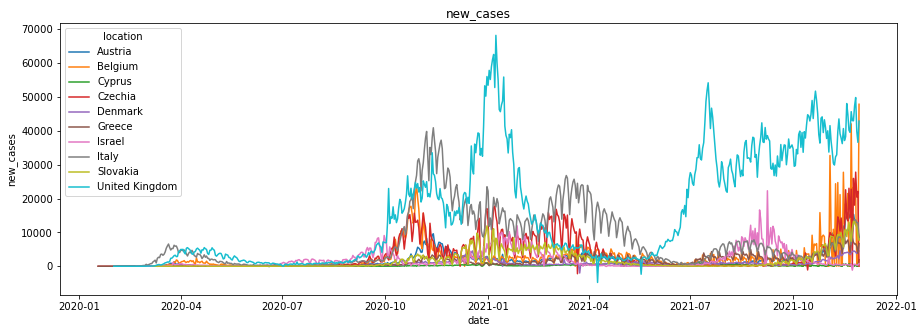

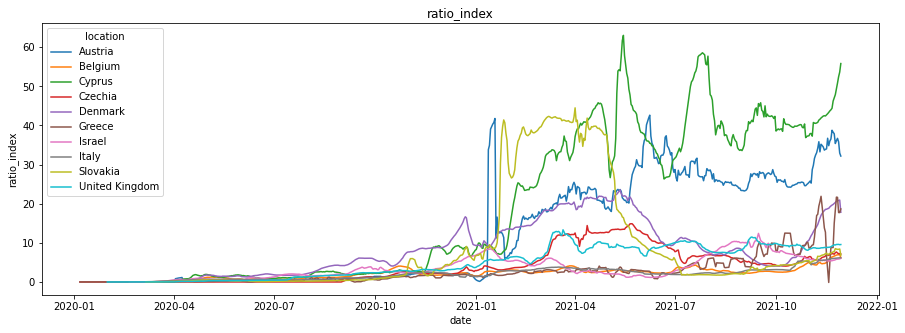

In [28]:
#나라별 마지막 행만 출력
#ratio(인구대비 확진자 비율) 순으로 정렬, 상위 5개 나라
locations=data.groupby(['location']).tail(1).sort_values('ratio_index', ascending=False).location.head(10).values
target=data[data.location.isin(locations)].reset_index(drop=True)

for v in ['total_cases', 'new_cases', 'ratio_index']:
    plt.figure(figsize=(15,5))
    plt.title(v)
    sns.lineplot(data=target, x='date', y=v, hue='location')
    plt.show()

2-3 한국의 코로나 신규 확진자 예측해라(선형 시계열모델 + 비선형시계열 각각 한개씩 만들어라)